In [17]:
import numpy as np
import pandas as pd
from datetime import datetime 
import matplotlib.pyplot as plt

## Import data and compute deltas

In [18]:
bins = np.linspace(0,6,600)
df = pd.read_csv('observed_headers.csv')
df['time_delta'] = df['first_seen_epoch_ms']-df['header_timestamp']
df

,first_seen_epoch_ms,header_timestamp,peer_id,header_cid,time_delta
0,1.654042e+09,1654041600,12D3KooWScFR7385LTyR4zU1bYdzSiiAb5rnNABfVahPvV...,bafy2bzaceard6jwerfy7i6uz6zswtkey55idvlmde3hbc...,0.213350
1,1.654042e+09,1654041600,12D3KooWScFR7385LTyR4zU1bYdzSiiAb5rnNABfVahPvV...,bafy2bzacechhio4g2rswn5q2foewbjhmtedd5mzhstona...,0.231278
2,1.654042e+09,1654041600,12D3KooWScFR7385LTyR4zU1bYdzSiiAb5rnNABfVahPvV...,bafy2bzacedl72rwz6ouvvu3x7oa276amerr5peqg2cdwf...,0.245952
3,1.654042e+09,1654041600,12D3KooWScFR7385LTyR4zU1bYdzSiiAb5rnNABfVahPvV...,bafy2bzacedabk2gvcqyo5oktloty2wtiymcjnzv3wnspq...,0.256922
4,1.654042e+09,1654041600,12D3KooWLFynvDQiUpXoHroV1YxKHhPJgysQGH2k3ZGwtW...,bafy2bzacechhio4g2rswn5q2foewbjhmtedd5mzhstona...,0.306224
...,...,...,...,...,...
3625328,1.661386e+09,1661385930,12D3KooWCwevHg1yLCvktf2nvLu7L9894mcrJR4MsBCcm4...,bafy2bzacebo7xqczp4izlhyx72lqlaait6sltpx2wsxa3...,0.287632
3625329,1.661386e+09,1661385930,12D3KooWCwevHg1yLCvktf2nvLu7L9894mcrJR4MsBCcm4...,bafy2bzaceclpnnveezyfz5esmvlkxfmdqwmpwuilcwt2u...,0.301404
3625330,1.661386e+09,1661385930,12D3KooWCwevHg1yLCvktf2nvLu7L9894mcrJR4MsBCcm4...,bafy2bzaceczwpd5debcwlehksjp7hlyg2ymnlc6oh5xib...,0.385500
3625331,1.661386e+09,1661385930,12D3KooWCwevHg1yLCvktf2nvLu7L9894mcrJR4MsBCcm4...,bafy2bzacec7psmxcl453hrsykxv6adejawwahbwm3znx7...,0.477145


In [19]:
df['time_delta'].describe()

count    3.625333e+06
mean     2.650739e+04
std      9.516005e+05
min     -2.489098e+01
25%      2.295039e-01
50%      3.124230e-01
75%      4.262199e-01
max      6.008209e+07
Name: time_delta, dtype: float64

## Plot first delivery of each block to *any* bootstrapper

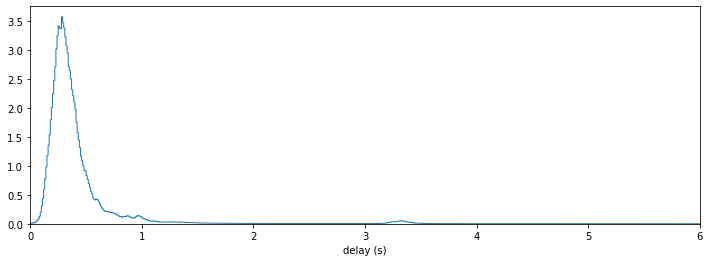

In [20]:
fig, ax1 = plt.subplots(figsize=(12, 4))
ax1.hist(df['time_delta'], bins, density=True, histtype='step')
ax1.set_xlabel('delay (s)')
plt.xlim([0, 6])
plt.show()

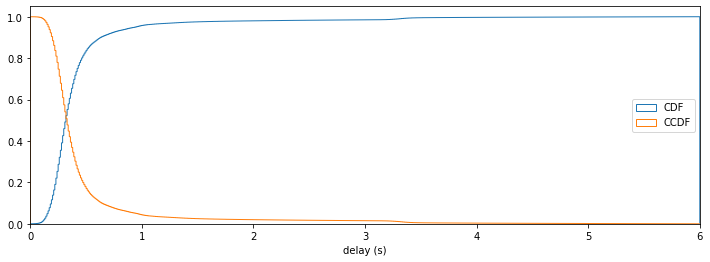

In [21]:
fig, ax2 = plt.subplots(figsize=(12, 4))
ax2.hist(df['time_delta'], bins, density=True, histtype='step', cumulative=1, label='CDF')
ax2.hist(df['time_delta'], bins, density=True, histtype='step', cumulative=-1, label='CCDF')
ax2.legend(loc='right')
ax2.set_xlabel('delay (s)')
plt.xlim([0, 6])
plt.show()

## Plot delivery to each individual bootstrapper

In [22]:
df_1 = df.loc[df['peer_id']=='12D3KooWLFynvDQiUpXoHroV1YxKHhPJgysQGH2k3ZGwtWzR4dFH']
df_2 = df.loc[df['peer_id']=='12D3KooWScFR7385LTyR4zU1bYdzSiiAb5rnNABfVahPvVSzyTkR']
df_3 = df.loc[df['peer_id']=='12D3KooWCwevHg1yLCvktf2nvLu7L9894mcrJR4MsBCcm4syShVc']

In [23]:
df_1['time_delta'].describe()

count    1.215481e+06
mean     1.905673e+04
std      7.787017e+05
min     -2.489098e+01
25%      2.548001e-01
50%      3.301470e-01
75%      4.431829e-01
max      6.008209e+07
Name: time_delta, dtype: float64

In [24]:
df_2['time_delta'].describe()

count    1.216037e+06
mean     4.059510e+04
std      1.193907e+06
min     -2.480040e+01
25%      1.790190e-01
50%      2.535620e-01
75%      3.680949e-01
max      6.007962e+07
Name: time_delta, dtype: float64

In [25]:
df_3['time_delta'].describe()

count    1.193694e+06
mean     1.949033e+04
std      8.236735e+05
min     -2.482439e+01
25%      2.674651e-01
50%      3.434579e-01
75%      4.517848e-01
max      6.008020e+07
Name: time_delta, dtype: float64

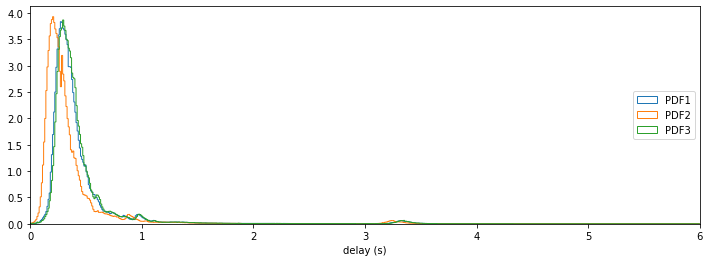

In [26]:
fig, ax3 = plt.subplots(figsize=(12, 4))
ax3.hist(df_1['time_delta'], bins, density=True, histtype='step', label='PDF1')
ax3.hist(df_2['time_delta'], bins, density=True, histtype='step', label='PDF2')
ax3.hist(df_3['time_delta'], bins, density=True, histtype='step', label='PDF3')
ax3.legend(loc='right')
ax3.set_xlabel('delay (s)')
plt.xlim([0, 6])
plt.show()

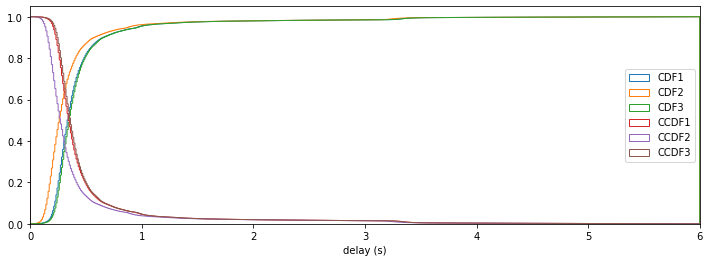

In [27]:
fig, ax4 = plt.subplots(figsize=(12, 4))
ax4.hist(df_1['time_delta'], bins, density=True, histtype='step', cumulative=1, label='CDF1')
ax4.hist(df_2['time_delta'], bins, density=True, histtype='step', cumulative=1, label='CDF2')
ax4.hist(df_3['time_delta'], bins, density=True, histtype='step', cumulative=1, label='CDF3')
ax4.hist(df_1['time_delta'], bins, density=True, histtype='step', cumulative=-1, label='CCDF1')
ax4.hist(df_2['time_delta'], bins, density=True, histtype='step', cumulative=-1, label='CCDF2')
ax4.hist(df_3['time_delta'], bins, density=True, histtype='step', cumulative=-1, label='CCDF3')
ax4.legend(loc='right')
ax4.set_xlabel('delay (s)')
plt.xlim([0, 6])
plt.show()